In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import folium
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Matplotlib : %s'%(mpl.__version__))
!python --version


Pandas : 1.1.3
Numpy : 1.19.2
Matplotlib : 3.3.2
Python 3.8.5


In [3]:
Crawling= pd.read_csv('data/장애인 스포츠강좌_자체 크롤링.csv', encoding = 'CP949')

In [4]:
# 데이터의 일부분 살펴보기
print('Shape Of Crawling Data :', Crawling.shape)
Crawling.head(3)


Shape Of Crawling Data : (1108, 19)


,시설명,대표자,연락처,시도,시군구,지도자,시설면적,운동종류,장애종류,강의명,시간,요일,강사명,기간,차량지원,장애 지원시설,수강료,경도,위도
0,(사)신나는사상스포츠클럽,유재우,02-319-7330,부산광역시,사상구,1명,1 ㎡,배드민턴,"지체, 시각, 청각/언어, 지적/자폐, 뇌병변, 기타",[12월] 생활체육,14:00 ~ 14:50,"화,목",소대승,2020.12.01 ~ 2020.12.10,미지원,"장애인 화장실,장애인용 엘리베이터,장애인전용 주차구역","80,000",128.994875,35.147446
1,(주)꿈자라다,김병식,031-719-1441,경기도,성남시,11명,409 ㎡,기타종목,"지적/자폐, 기타",[12월] 특수체육,13:00 ~ 20:00,"월,화,수,목,금,토",류정국,2020.12.01 ~ 2020.12.10,미지원,"장애인 화장실,장애인용 엘리베이터,장애인전용 주차구역,주출입구 단차없음","80,000",127.122609,37.408783
2,(주)디에스그룹 달서복싱체육관 대곡점,정희준,02-244-7362,대구광역시,달성군,3명,3362 ㎡,복싱,"지체, 시각, 청각/언어, 지적/자폐, 기타",[12월] 신나는 운동 복싱교실 헬스,11:00 ~ 11:00,"월,화,수,목,금","정희준,,손예지",2020.12.01 ~ 2020.12.10,미지원,"장애인전용 주차구역,주출입구 단차없음,시각장애인 편의서비스,청각장애인 편의서비스","80,000",128.511288,35.809193


In [5]:
# 시도에 따라 시설을 확인해야 하기에 '시/도' 변수 확인
print(Crawling['시도'].unique(), '\n')
print('시도 개수  :', len(Crawling['시도'].unique()))

['부산광역시' '경기도' '대구광역시' '서울특별시' '충청북도' '울산광역시' '강원도' '경상남도' '전라남도' '전남'
 '광주' '서울시' '세종특별자치시' '경기' '북구' '경남' '경상북도' '의성군' '광주광역시' '대전광역시' '경북'
 '충남' '전라북도' '인천광역시' '충청남도' '수원시' '인천시' '충북' '대전시' '제주시' '부산시' '봉화군' '문경시'
 '제주특별자치도' '수성구' '순천시' '양주시' '서울' '영천시' '김천시' '전북' '의정부시' '대구' '경산시' '포항시'
 '강북구' '동래구'] 

시도 개수  : 47


각 관측치의 주소가 일정한 형식으로 기입되어 있지 않음을 볼 수 있다.
즉, 수정이 필요하다.

In [6]:
    # 17개의 시/도 리스트 만들기
    부산 = ['부산광역시', '부산시', '동래구']
    경기 = ['경기도', '경기', '수원시', '양주시', '의정부시']
    대구 = ['대구광역시', '북구', '수성구', '대구']
    서울 = ['서울특별시', '서울시', '서울', '강북구']
    충북 = ['충청북도', '충북']
    충남 = ['충남', '충청남도']
    울산 = ['울산광역시']
    강원 = ['강원도']
    경남 = ['경상남도', '경남']
    경북 = ['경상북도', '의성군', '경북', '봉화군', '문경시', '영천시', '김천시', '경산시', '포항시']
    전남 = ['전라남도', '전남', '순천시']
    전북 = ['전라북도', '전북']
    광주 = ['광주', '광주광역시']
    세종 = ['세종특별자치시']
    대전 = ['대전광역시', '대전시']
    인천 = ['인천광역시', '인천시']
    제주 = ['제주시', '제주특별자치도']

In [7]:
시도_list = [부산, 경기, 대구, 서울, 충북, 충남, 울산, 강원, 경남, 경북, 전남, 전북, 광주, 세종, 대전, 인천, 제주]

시도_text_list = ['부산', '경기', '대구', '서울', '충북', '충남', '울산', '강원', '경남', 
                '경북', '전남', '전북', '광주','세종', '대전', '인천', '제주']

# 반복문을 통해 '시/도' 변수 수정하기
for value, text in zip(시도_list, 시도_text_list):
    Crawling.loc[Crawling['시도'].isin(value), '시도'] = text

In [8]:
# 변환 후 '시/도' 변수 확인
print(Crawling['시도'].unique(), '\n')
print(' 시도 개수 :', len(Crawling['시도'].unique()))

['부산' '경기' '대구' '서울' '충북' '울산' '강원' '경남' '전남' '광주' '세종' '경북' '대전' '충남'
 '전북' '인천' '제주'] 

 시도 개수 : 17


- 장애종류 변수에는 '지체', '시각', '청각', '언어', '지적', '자폐', '뇌병변', '기타' 총 8개의 유형이 있음을 볼 수 있다.
- 데이터에서 콤마(,)와 슬래시(/)로 저장되어 있으므로 각 장애유형을 하나의 변수로 만들어주자.
- 또한, 장애 지원시설 변수에도 각 지원시설마다 콤마(,)로 저장되어 있으므로 같은 작업을 해주도록 하자.

In [9]:
# 장애종류 변수
Crawling['지체'] = 0
Crawling['시각'] = 0
Crawling['청각'] = 0
Crawling['언어'] = 0
Crawling['지적'] = 0
Crawling['자폐'] = 0
Crawling['뇌병변'] = 0
Crawling['기타'] = 0

for index in range(Crawling.shape[0]):
    
    # split 함수를 사용해 나눠주기
    종류_list = re.split('[,/]', Crawling['장애종류'][index])
    
#     # 나눈 결과 양쪽 공백이 포함되는 경우도 있으므로 공백 제거
    종류_list = [value.strip() for value in 종류_list]
    
    if '지체' in 종류_list:
        Crawling.loc[index, '지체'] = 1

    if '시각' in 종류_list:
        Crawling.loc[index, '시각'] = 1
        
    if '청각' in 종류_list:
        Crawling.loc[index, '청각'] = 1
        
    if '언어' in 종류_list:
        Crawling.loc[index, '언어'] = 1
    
    if '지적' in 종류_list:
        Crawling.loc[index, '지적'] = 1
    
    if '자폐' in 종류_list:
        Crawling.loc[index, '자폐'] = 1
        
    if '뇌병변' in 종류_list:
        Crawling.loc[index, '뇌병변'] = 1
        
    if '기타' in 종류_list:
        Crawling.loc[index, '기타'] = 1 
        
# 각 장애종류를 변수로 만든 후 장애종류 변수 삭제
Crawling.drop('장애종류', axis = 1, inplace = True)

In [10]:
# 지원시설 변수를 변경하기 위한 함수 만들기
def 지원시설_extract(data):

    # 결측값을 가지지 않는 데이터를 추출하고 그 데이터의 index를 변수로 저장
    data1 = data[data['장애 지원시설'].isnull() == False]
    data1_list = data1.index
    
    # 장애 지원시설에 대한 변수 만들어주기
    data1['장애인 화장실'] = 0
    data1['장애인용 엘리베이터'] = 0
    data1['장애인전용 주차구역'] = 0
    data1['주출입구 단차없음'] = 0
    data1['휠체어 대여'] = 0
    data1['시각장애인 편의서비스'] = 0
    data1['청각장애인 편의서비스'] = 0
    
    for index in data1_list:
        지원시설_list = data1['장애 지원시설'][index].split(',')
        지원시설_list = [value.strip() for value in 지원시설_list]
        
        if '장애인 화장실' in 지원시설_list:
            data1.loc[index, '장애인 화장실'] = 1
            
        if '장애인용 엘리베이터' in 지원시설_list:
            data1.loc[index, '장애인용 엘리베이터'] = 1
            
        if '장애인전용 주차구역' in 지원시설_list:
            data1.loc[index, '장애인전용 주차구역'] = 1
            
        if '주출입구 단차없음' in 지원시설_list:
            data1.loc[index, '장애인전용 주차구역'] = 1
            
        if '휠체어 대여' in 지원시설_list:
            data1.loc[index, '휠체어 대여'] = 1
        
        if '시각장애인 편의서비스' in 지원시설_list:
            data1.loc[index, '시각장애인 편의서비스'] = 1
        
        if '청각장애인 편의서비스' in 지원시설_list:
            data1.loc[index, '청각장애인 편의서비스'] = 1
            
    data2 = data[data['장애 지원시설'].isnull() == True]
    data2_list = data2.index
    
    # 장애 지원시설에 대한 변수 만들어주기
    data2['장애인 화장실'] = 0
    data2['장애인용 엘리베이터'] = 0
    data2['장애인전용 주차구역'] = 0
    data2['주출입구 단차없음'] = 0
    data2['휠체어 대여'] = 0
    data2['시각장애인 편의서비스'] = 0
    data2['청각장애인 편의서비스'] = 0
    
    for index in data2_list:
        data2.loc[index, '장애인 화장실'] = 0
        data2.loc[index, '장애인용 엘리베이터'] = 0
        data2.loc[index, '장애인전용 주차구역'] = 0
        data2.loc[index, '주출입구 단차없음'] = 0
        data2.loc[index, '휠체어 대여'] = 0
        data2.loc[index, '시각장애인 편의서비스'] = 0
        data2.loc[index, '청각장애인 편의서비스'] = 0
        
    transform_data = pd.concat([data1, data2], ignore_index = True)
    
    return transform_data

In [11]:
print('Shape Of Data *Before Change* :', Crawling.shape, '\n')
Crawling = 지원시설_extract(Crawling)

# '장애 지원시설' 변수 삭제하기
Crawling = Crawling.drop('장애 지원시설', axis = 1)
print('Shape Of Data *After Change* :', Crawling.shape)


Shape Of Data *Before Change* : (1108, 26) 

Shape Of Data *After Change* : (1108, 32)


- 수강료 변수가 object 타입이고 콤마(,)가 있으므로 제거해주고 숫자형으로 변환해주자.

In [12]:
Crawling['수강료'] = pd.to_numeric([re.sub(",", "", value) for value in Crawling['수강료']])


In [13]:
def 지도시각화(raw_data):
    # 대한민국 중앙을 초기 위치로 설정하여 지도 객체 생성
    지도 = folium.Map(location = [36.40886055894505, 127.63462243700751], zoom_start = 8)
    print("0. 아래 해당되는 시/도를 입력해주세요\n"+str(list(Crawling['시도'].unique())))
    # 시/도명 입력 받기
    시도명 = input('1. 거주하고 계신 시/도명을 입력해주세요 : ')
    print()
    
    # 시군구 입력 받기
    시군구_list = raw_data[raw_data['시도'] == 시도명]['시군구'].unique()
    print(시군구_list, '\n')
    시군구 = input('2. 위에서 행정구역을 선택해 주세요 : ')
    print()
    
    # 장애종류를 보여주기 위해 장애_list 변수 지정
    장애_list = ['지체', '시각', '청각', '언어', '지적', '자폐', '뇌병변', '기타']
    print('')
    print(장애_list, '\n')
    
    # 장애명 입력 받기
    장애명 = input('3. 위에서 장애명을 선택해주세요 : ')
    print('\n')
    
    # 입력한 데이터에서 사용자가 위치해 있는 '시/도'와 사용자의 장애명에 일치하는 데이터를 추출
    data = raw_data[(raw_data['시도'] == 시도명) & (raw_data[장애명] == 1) & (raw_data['시군구'] == 시군구)]
    
    # 추출된 데이터에서 가능한 운동종류를 출력
    운동_list = data['운동종류'].unique()
    print('위에서 선택한 조건으로 수강가능한 운동은 다음과 같습니다', '\n')
    print(운동_list, '\n')
    
    # 운동명 입력 받기
    운동명 = input('4. 수강 운동을 선택해주세요 : ')
    
    # 사용자가 선택한 운동 종목을 추출
    data = data[data['운동종류'] == 운동명]
    
    for index in data.index:
        # 추출한 데이터에서 '위도'와 '경도'를 변수로 지정
        위도 = data.loc[index, '위도']
        경도 = data.loc[index, '경도']
        
        # 지도시각화를 했을 때 '시설명'과 '수강료'를 볼 수 있도록 변수로 지정
        시설명 = data.loc[index, '시설명']
        수강료 = data.loc[index, '수강료']
        
        # [시작] 지도시각화를 했을 때 지원가능한 장애시설이 무엇이 있는지 확인할 수 있도록 해주는 과정
        장애지원_list = []
        
        if data.loc[index, '장애인 화장실'] == 1:
            장애지원_list.append('장애인 화장실')
            
        if data.loc[index, '장애인용 엘리베이터'] == 1:
            장애지원_list.append('장애인용 엘리베이터')
            
        if data.loc[index, '장애인전용 주차구역'] == 1:
            장애지원_list.append('장애인전용 주차구역')
            
        if data.loc[index, '주출입구 단차없음'] == 1:
            장애지원_list.append('주출입구 단차없음')
            
        if data.loc[index, '휠체어 대여'] == 1:
            장애지원_list.append('휠체어 대여')
            
        if data.loc[index, '시각장애인 편의서비스'] == 1:
            장애지원_list.append('시각장애인 편의서비스')
            
        if data.loc[index, '청각장애인 편의서비스'] == 1:
            장애지원_list.append('청각장애인 편의서비스')
        # [끝] 지도시각화를 했을 때 지원가능한 장애시설이 무엇이 있는지 확인할 수 있도록 해주는 과정
        
        # tooltip 설정해주는 과정
        text_1 = '''시설명 : {} 수강료 : {} 원'''.format(시설명, 수강료)
        tooltip = folium.Tooltip(text_1)
        
        # 차량 지원에 따라 색상 지정
        color = 'blue'
        
        if data.loc[index, '차량지원'] == '미지원':
            color = 'red'
        
        # poput 설정해주는 과정
        text_2 = ", ".join(장애지원_list)
        
        # 지원시설이 없는 경우 오류가 날 수 있기 때문에 따로 지정
        if len(장애지원_list) >= 1:
            popup = folium.Popup(text_2, max_width = 150)
            folium.CircleMarker([위도, 경도], popup = popup, color = color, tooltip = tooltip, radius = 8).add_to(지도)
            
        else:
            folium.CircleMarker([위도, 경도], popup = '지원시설 없습니다.', color = color, tooltip = tooltip, radius = 8).add_to(지도)
        
    return 지도

In [14]:
# 경기도 => 의정부시 => 지체 => 태권도 지도 시각화
지도시각화(Crawling)

0. 아래 해당되는 시/도를 입력해주세요
['부산', '경기', '대구', '서울', '울산', '강원', '경남', '세종', '충북', '전남', '경북', '광주', '충남', '인천', '전북', '대전', '제주']

['성남시' '광주시' '평택시' '의정부시' '고양시' '구리시' '수원시' '팔달구' '화성시' '남양주시' '시흥시' '안산시'
 '부천시' '의왕시' '안양시' '김포시' '광명시' '용인시' '안성시' '은현면' '양주시' '과천시' '하남시' '금신로'
 '신흥로173' '권선구' '연천군' '파주시' '군포시' '가평군' '포천시'] 



['지체', '시각', '청각', '언어', '지적', '자폐', '뇌병변', '기타'] 



위에서 선택한 조건으로 수강가능한 운동은 다음과 같습니다 

['태권도' '요가'] 



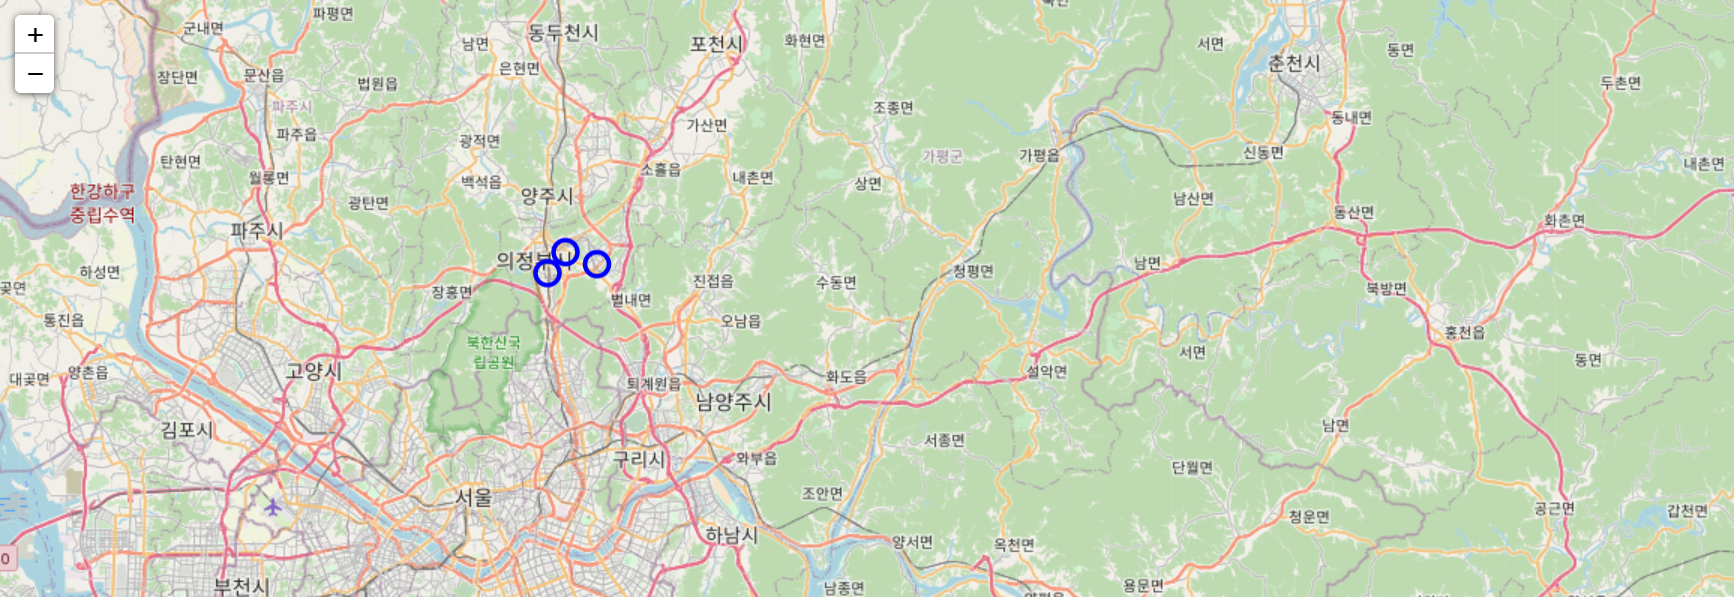

In [1]:
from IPython.display import Image
 
Image("map.png") # code안에서 나오게 할 때